<a href="https://colab.research.google.com/github/RakshithSuresh/ML-Projects/blob/main/(DT)Regression_Tree_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
sizes = np.random.randint(500, 3000, size=100)  # Size in square feet
# Simulate price: base + size influence + some noise
prices = 50 + (sizes * 0.1) + np.random.normal(0, 20, size=100)

# Create DataFrame
df = pd.DataFrame({
    'Size_sqft': sizes,
    'Price_k': prices.round(2)  # Prices in $1000s
})

# Display first 5 rows
df.head()

,Size_sqft,Price_k
0,1360,176.42
1,1794,225.69
2,1630,190.87
3,1595,185.58
4,2138,280.05


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing
X = df[['Size_sqft']]
y = df['Price_k']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression tree model
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

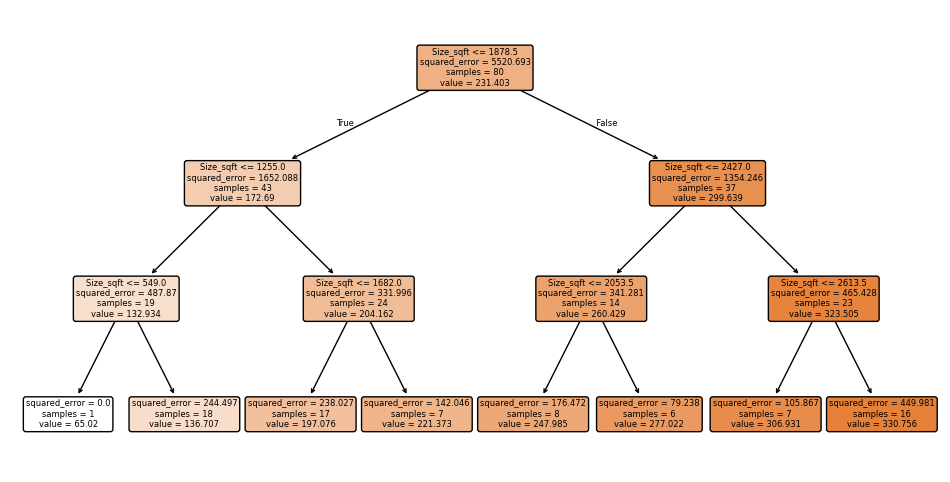

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=['Size_sqft'], filled=True, rounded=True)
plt.show()


In [9]:
# Predict on test set
y_pred = tree.predict(X_test)

# Compare some predictions to actual values
comparison = pd.DataFrame({
    'Size_sqft': X_test['Size_sqft'].values,
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

comparison.head(10)

,Size_sqft,Actual Price,Predicted Price
0,1652,218.89,197.075882
1,2085,307.76,277.021667
2,837,102.69,136.707222
3,1863,244.38,221.372857
4,2541,300.87,306.931429
5,2935,338.81,330.756250
6,521,131.66,65.020000
7,2562,310.75,306.931429
8,2635,320.73,330.756250
9,1360,176.42,197.075882


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predict on test data
y_pred = tree.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 17.01
Mean Squared Error (MSE): 538.86
Root Mean Squared Error (RMSE): 23.21
R² Score: 0.90
